In [24]:
import math
from logging import debug

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import copy
from math import sqrt,ceil
from scipy.stats import linregress
import libraries as lib

In [25]:
# Define each directory for the required paths with updated paths
directory2 = "../../../OneDrive - HvA/Logfiles/SOLAR/2024/2024-10-24_sleeptest/0056 - 20241024T115530 1h25m5s 12.315km De Rijp - Uitgeest - De Rijp"
# Process each directory with lib.DataUitzoekenGui
result2 = lib.DataUitzoekenGui(directory2)

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '1_Master_08_05.csv', '2_MPPT_0_05_05.csv', '3_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

In [26]:
# Na het laden van de bestanden en het klikken op de knop
# Controleer of 'merged_df' in result zit
if 'merged_df' in result2:
    merged_df = result2['merged_df'].copy()
    # Gebruik merged_df zoals je wilt
else:
    print("De data is nog niet geladen.")
merged_df

,1_Datalogger port,"1_Dataloggertijd, in s",1_Cycle count,1_Tijd,1_Latitude,1_Longitude,1_Snelheid over de grond in km/h,1_Richting van de snelheid,1_Datum,1_Magnetische variatie,...,"2_Externe ingangsspanning, in V","2_Spanning op V_Analog, in V","2_Spanning op de supercaps, in V","2_Externe temperatuur, in graden Celsius","2_Interne temperatuur, in graden Celsius","2_Laadstroom van de supercaps, in mA","2_Stroom door de load cell, in mA",2_Datalogger port,2_Format header (>21|02),"2_Load cell interface tijd, in s"
Indextijd,,,,,,,,,,,,,,,,,,,,,
0 days 00:02:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.293000,5.071200,5.758200,0.027200,24.305200,38.700000,12.1,B,21|02,3554.85
0 days 00:02:20,9.0,140.4098,145.861,95531.0,5233.2842,446.5866,3.9,324.9,241024.0,NaN,...,1.293000,5.072000,5.759400,0.027200,24.311800,38.740000,12.1,B,21|02,3555.75
0 days 00:02:21,9.0,141.4102,146.860,95532.0,5233.2847,446.5861,3.9,325.2,241024.0,NaN,...,1.293500,5.075000,5.762333,0.027333,24.324833,38.766667,12.1,B,21|02,3556.65
0 days 00:02:22,9.0,142.4364,147.886,95533.0,5233.2850,446.5858,3.9,325.3,241024.0,NaN,...,1.292857,5.075857,5.762714,0.027143,24.328857,38.714286,12.1,B,21|02,3557.70
0 days 00:02:23,9.0,143.4079,148.859,95534.0,5233.2856,446.5850,3.9,324.7,241024.0,NaN,...,1.292667,5.075833,5.763167,0.027167,24.333167,38.700000,12.1,B,21|02,3558.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 01:27:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.320857,5.078000,5.764714,0.027000,25.531714,38.742857,12.1,B,21|02,8667.60
0 days 01:27:33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.320857,5.078571,5.764857,0.027429,25.528429,38.771429,12.1,B,21|02,8668.65
0 days 01:27:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.320333,5.077333,5.764167,0.027000,25.527667,38.766667,12.1,B,21|02,8669.70


In [36]:
# Convert '1_Tijd' from HHMMSS format to seconds since midnight
def hhmmss_to_seconds(hhmmss):
    hours = hhmmss // 10000
    minutes = (hhmmss % 10000) // 100
    seconds = hhmmss % 100
    return hours * 3600 + minutes * 60 + seconds

# Apply conversion to the time column
merged_df['Time_in_seconds'] = merged_df['1_Tijd'].apply(hhmmss_to_seconds)

# Only allow data that isn't NaN for speed over the grond and speed over water
merged_df = merged_df.dropna(subset=['1_Snelheid over de grond in km/h', '1_Snelheid tenopzichte van het water in Kilometers per uur'])

#filter de data vanaf tijdstip 170000 tot 190000
#filter the data where snelheid over the grond or snelheid tenopzichte van het water is not 0 and snelheid ten opzichte van het water is lower then 20
# merged_df = merged_df[merged_df['1_Snelheid over de grond in km/h'] > 0]
# merged_df = merged_df[merged_df['1_Snelheid tenopzichte van het water in Kilometers per uur'] > 0]
# merged_df = merged_df[merged_df['Time_in_seconds'] < 38000]
# merged_df = merged_df[merged_df['Time_in_seconds'] > 36750]


display(merged_df)
lib.plot_trajectory_map(merged_df['1_Latitude'].dropna(), merged_df['1_Longitude'].dropna(), merged_df['1_Snelheid over de grond in km/h'].dropna())

,1_Datalogger port,"1_Dataloggertijd, in s",1_Cycle count,1_Tijd,1_Latitude,1_Longitude,1_Snelheid over de grond in km/h,1_Richting van de snelheid,1_Datum,1_Magnetische variatie,...,"2_Spanning op V_Analog, in V","2_Spanning op de supercaps, in V","2_Externe temperatuur, in graden Celsius","2_Interne temperatuur, in graden Celsius","2_Laadstroom van de supercaps, in mA","2_Stroom door de load cell, in mA",2_Datalogger port,2_Format header (>21|02),"2_Load cell interface tijd, in s",Time_in_seconds
Indextijd,,,,,,,,,,,,,,,,,,,,,
0 days 00:02:20,9.0,140.40980,145.861,95531.0,5233.2842,446.5866,3.9,324.9,241024.0,NaN,...,5.072000,5.759400,0.027200,24.311800,38.740000,12.1,B,21|02,3555.75,35731.0
0 days 00:02:21,9.0,141.41020,146.860,95532.0,5233.2847,446.5861,3.9,325.2,241024.0,NaN,...,5.075000,5.762333,0.027333,24.324833,38.766667,12.1,B,21|02,3556.65,35732.0
0 days 00:02:22,9.0,142.43640,147.886,95533.0,5233.2850,446.5858,3.9,325.3,241024.0,NaN,...,5.075857,5.762714,0.027143,24.328857,38.714286,12.1,B,21|02,3557.70,35733.0
0 days 00:02:23,9.0,143.40790,148.859,95534.0,5233.2856,446.5850,3.9,324.7,241024.0,NaN,...,5.075833,5.763167,0.027167,24.333167,38.700000,12.1,B,21|02,3558.75,35734.0
0 days 00:02:24,9.0,144.41880,149.869,95535.0,5233.2859,446.5843,3.9,325.0,241024.0,NaN,...,5.076429,5.763429,0.027000,24.332571,38.714286,12.1,B,21|02,3559.65,35735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 01:27:20,9.0,5239.53470,5245.749,112030.0,5233.2062,446.7717,0.0,35.0,241024.0,NaN,...,5.078286,5.765286,0.027429,25.542000,38.742857,12.1,B,21|02,8655.60,40830.0
0 days 01:27:21,9.0,5240.51280,5246.728,112031.0,5233.2062,446.7717,0.0,35.0,241024.0,NaN,...,5.079714,5.766429,0.027000,25.548571,38.757143,12.1,B,21|02,8656.65,40831.0
0 days 01:27:22,9.0,5241.50830,5247.724,112032.0,5233.2062,446.7717,0.0,35.0,241024.0,NaN,...,5.079667,5.766333,0.027167,25.547500,38.766667,12.1,B,21|02,8657.70,40832.0


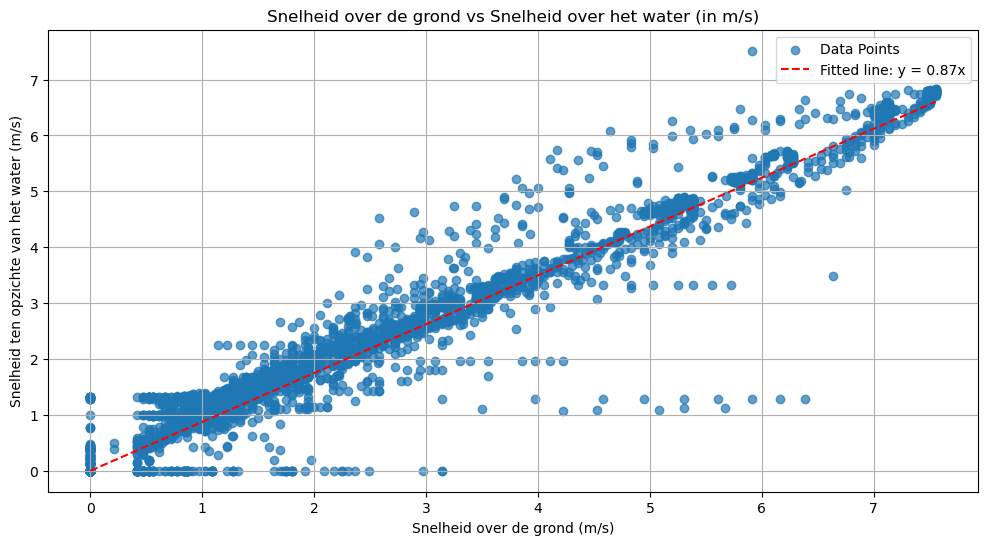

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming merged_df is already defined and contains the necessary columns

# Convert speeds to m/s
x = merged_df['1_Snelheid over de grond in km/h'] / 3.6  # Ground speed in m/s
y = merged_df['1_Snelheid tenopzichte van het water in Kilometers per uur'] / 3.6  # Water speed in m/s

# Fit a line through the origin
slope, _, _, _, _ = linregress(x, y)

# Plot the data points
plt.figure(figsize=(12, 6))
plt.scatter(x, y, label='Data Points', alpha=0.7)

# Plot the fitted line (through origin)
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = slope * x_fit
plt.plot(x_fit, y_fit, label=f'Fitted line: y = {slope:.2f}x', color='red', linestyle='--')

# Add labels, title, legend, and grid
plt.xlabel('Snelheid over de grond (m/s)')
plt.ylabel('Snelheid ten opzichte van het water (m/s)')
plt.title('Snelheid over de grond vs Snelheid over het water (in m/s)')
plt.legend()
plt.grid()
plt.show()


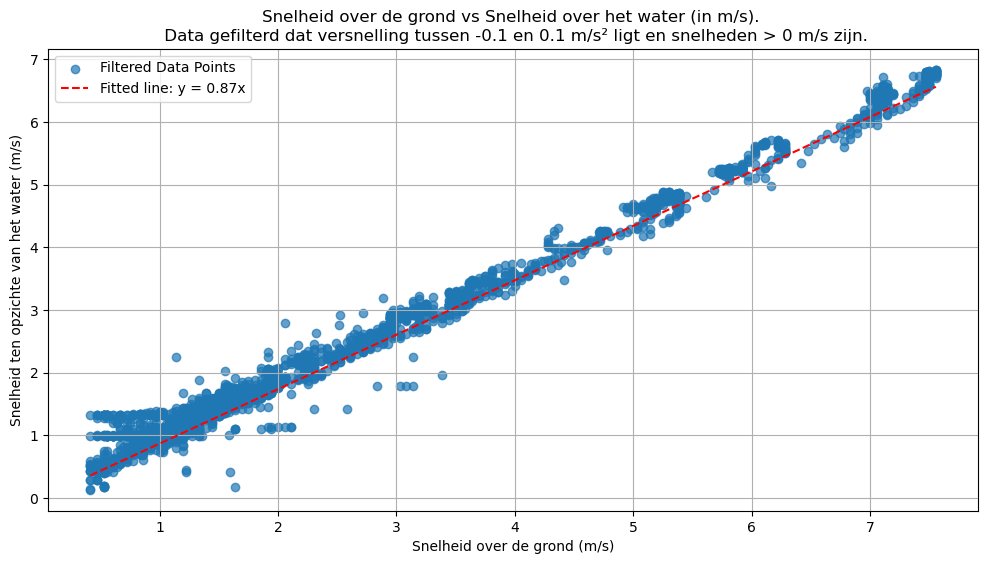

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress

# Assuming merged_df is already defined and contains the necessary columns

# Create a clean DataFrame with speeds converted to m/s
clean_df = merged_df.copy()
clean_df['Ground Speed (m/s)'] = clean_df['1_Snelheid over de grond in km/h'] / 3.6
clean_df['Water Speed (m/s)'] = clean_df['1_Snelheid tenopzichte van het water in Kilometers per uur'] / 3.6

# Calculate acceleration (difference in speed over time, assuming consecutive rows represent equal time intervals)
clean_df['Acceleration (m/s^2)'] = clean_df['Ground Speed (m/s)'].diff()

# Filter data for:
# 1. Acceleration between -0.1 and 0.1 m/s²
# 2. Non-zero ground and water speeds
filtered_df = clean_df[
    (clean_df['Acceleration (m/s^2)'] >= -0.1) & 
    (clean_df['Acceleration (m/s^2)'] <= 0.1) &
    (clean_df['Ground Speed (m/s)'] > 0) &
    (clean_df['Water Speed (m/s)'] > 0)
]

# Plotting the filtered data
x = filtered_df['Ground Speed (m/s)']
y = filtered_df['Water Speed (m/s)']

# Fit a line through the origin
slope, _, _, _, _ = linregress(x, y)

# Plot the data points
plt.figure(figsize=(12, 6))
plt.scatter(x, y, label='Filtered Data Points', alpha=0.7)

# Plot the fitted line (through origin)
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = slope * x_fit
plt.plot(x_fit, y_fit, label=f'Fitted line: y = {slope:.2f}x', color='red', linestyle='--')

# Add labels, title, legend, and grid
plt.xlabel('Snelheid over de grond (m/s)')
plt.ylabel('Snelheid ten opzichte van het water (m/s)')
plt.title('Snelheid over de grond vs Snelheid over het water (in m/s). \n Data gefilterd dat versnelling tussen -0.1 en 0.1 m/s² ligt en snelheden > 0 m/s zijn.')
plt.legend()
plt.grid()
plt.show()


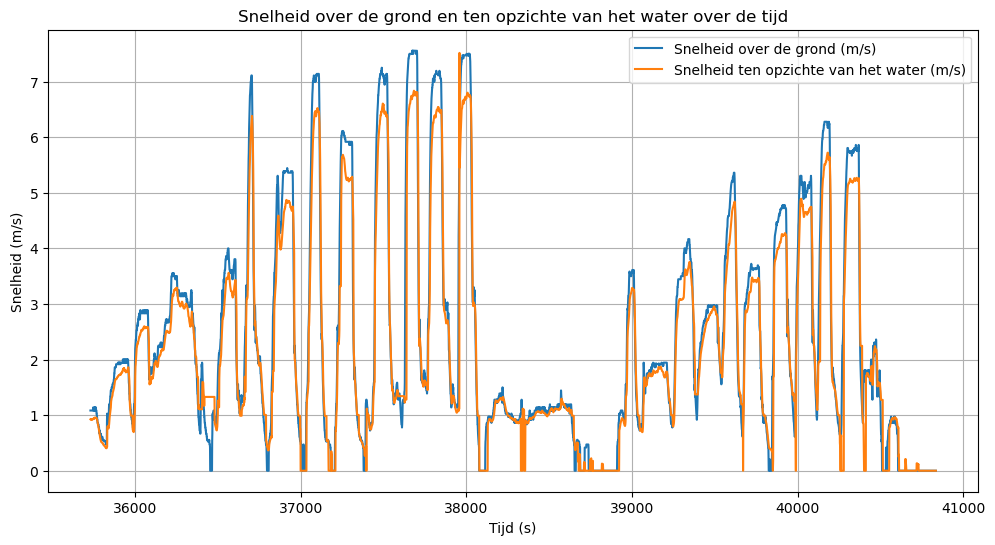

In [47]:
# Plotting both of these speeds over the time
plt.figure(figsize=(12, 6))
plt.plot(clean_df['Time_in_seconds'], clean_df['Ground Speed (m/s)'], label='Snelheid over de grond (m/s)')
plt.plot(clean_df['Time_in_seconds'], clean_df['Water Speed (m/s)'], label='Snelheid ten opzichte van het water (m/s)')

plt.xlabel('Tijd (s)')
plt.ylabel('Snelheid (m/s)')
plt.title('Snelheid over de grond en ten opzichte van het water over de tijd')
plt.legend()
plt.grid()

plt.show()


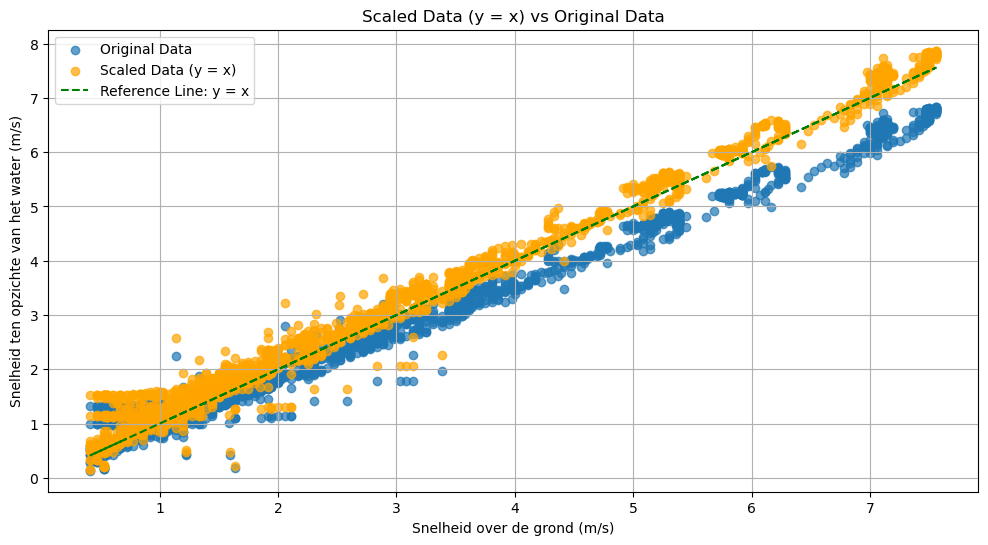

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming filtered_df already exists

# Extract ground and water speeds from filtered data
x = filtered_df['Ground Speed (m/s)']
y = filtered_df['Water Speed (m/s)']

# Fit a line through the origin
slope, _, _, _, _ = linregress(x, y)

# Scale the water speed data to make the relationship y = x
scaled_y = y / slope

# Plot the original and scaled data
plt.figure(figsize=(12, 6))

# Original data scatter plot
plt.scatter(x, y, label='Original Data', alpha=0.7)

# Scaled data scatter plot
plt.scatter(x, scaled_y, label='Scaled Data (y = x)', alpha=0.7, color='orange')

# Reference line for y = x
plt.plot(x, x, label='Reference Line: y = x', color='green', linestyle='--')

# Add labels, title, legend, and grid
plt.xlabel('Snelheid over de grond (m/s)')
plt.ylabel('Snelheid ten opzichte van het water (m/s)')
plt.title('Scaled Data (y = x) vs Original Data')
plt.legend()
plt.grid()
plt.show()


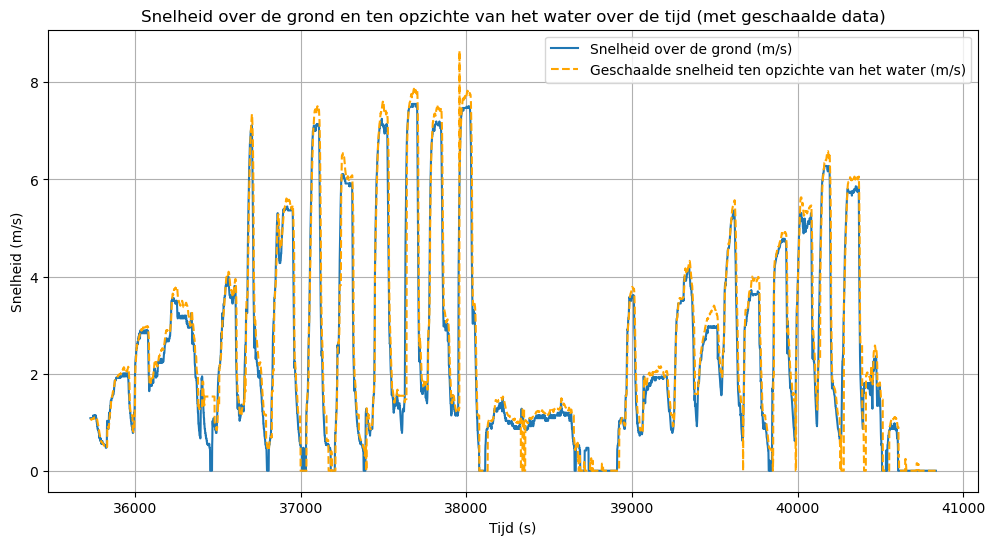

In [51]:
import matplotlib.pyplot as plt

# Assuming clean_df already exists and has the scaled data

# Add scaled water speed to clean_df
clean_df['Scaled Water Speed (m/s)'] = clean_df['Water Speed (m/s)'] / slope  # Using the previously computed slope

# Plot ground speed, original water speed, and scaled water speed over time
plt.figure(figsize=(12, 6))

# Ground speed plot
plt.plot(clean_df['Time_in_seconds'], clean_df['Ground Speed (m/s)'], label='Snelheid over de grond (m/s)')

# Scaled water speed plot
plt.plot(clean_df['Time_in_seconds'], clean_df['Scaled Water Speed (m/s)'], label='Geschaalde snelheid ten opzichte van het water (m/s)', linestyle='--', color='orange')

# Add labels, title, legend, and grid
plt.xlabel('Tijd (s)')
plt.ylabel('Snelheid (m/s)')
plt.title('Snelheid over de grond en ten opzichte van het water over de tijd (met geschaalde data)')
plt.legend()
plt.grid()

plt.show()
